In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

# 데이터 수집.
from bs4 import BeautifulSoup
import urllib.request as REQ

#### Pandas의 옵션(Option)을 설정하는 방법
- pd.set_option()


| 설정 | 기본값 | 정보 |
|-----|----|------|
| `display.max_rows` | 60 | Out으로 출력하는 최대 행의 개수 |
| `display.max_columns` | 0 or 20 |Out으로 출력하는 최대 열의 개수 |
| `display.max_colwidth` | 50 | 한 열의 너비 |
| `display.expand_frame_repr` | True | 데이터 프레임 열의 출력 방식.(단일행(False) vs 개행(True)) |
| `display.precision` | 6 | 소수점 이하 출력의 개수 |
| `display.colheader_justify` | right | 칼럼 정렬 위치 |


#### 중앙일보 전체기사 xml

In [2]:
jurl ='https://rss.joins.com/joins_news_list.xml'

# urllib.request : 모듈은 복잡한 세계에서 URL(대부분 HTTP)을 여는 데 도움이 되는 함수와 클래스를 정의.
response = REQ.urlopen(jurl)

# BeautifulSoup : html 코드를 Python이 이해하는 객체 구조로 변환하는 Parsing을 맡아줌.
soup = BeautifulSoup( response, 'html.parser') 

In [3]:
# soup.select('selector')
for item in soup.select('item'):
    print( "기사 제목 :", item.title.string)
    print( "기사 내용 :", item.description.string)
    print("-"*133)

기사 제목 : "여자는 軍 안가서···" 면접후기에 '생리대왕' 동아제약 발칵 
기사 내용 : 해당 영상 댓글에 한 네티즌이 "지난해 동아제약 채용 과정에서 차별을 당했다"는 취지의 글을 올렸고, 뒤이어 비슷한 후기가 이어지며 채용 성차별 논란이 일었다. 동아제약 측은 해당 영상에 최 사장 명의의 댓글을 통해 "지난해 신입사원 채용 1차 실무면접과정에서 면접관 중 한명이 지원자에게 면접 매뉴얼을 벗어난 
-------------------------------------------------------------------------------------------------------------------------------------
기사 제목 : '평창 쇼트트랙 金' 임효준, 중국 귀화..."운동할 방법만 고민"
기사 내용 : 평창 올림픽 남자 쇼트트랙 금메달리스트 임효준(25)이 중국에 귀화했다. 임효준의 에이전시 브리온컴퍼니는 6일 입장문을 통해 "임효준이 중국 귀화를 결정했다"며 "아직 한참 선수 생활을 이어갈 시기에 그러지 못하는 어려움과 아쉬움에 기인한 바가 크다"라고 밝혔다. 임효준은 소속사를 통해 "임효준은 한국 선수로서 
-------------------------------------------------------------------------------------------------------------------------------------
기사 제목 : '평창 금메달 리스트' 쇼트트랙 임효준, 중국 귀화
기사 내용 : 평창 올림픽 남자 쇼트트랙 금메달리스트 임효준(25)이 중국에 귀화했다. 임효준은 소속사를 통해 "임효준은 한국 선수로서 태극기를 달고 베이징 올림픽에 나가 올림픽 2연패의 영광을 누리고 싶었지만 한국 어느 곳에서도 훈련조차 할 수 없었고, 빙상 선수로서 다시 스케이트화를 신고 운동할 방법만 고민했다"고 전했다
------------------------------------------------------

#### 기상청 데이터

In [4]:
kurl = 'http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
kresponse = REQ.urlopen(kurl)
ksoup = BeautifulSoup( kresponse, 'html.parser')

In [5]:
# 도시명 파악.
for location in ksoup.select('location'):
    print( "도시 :", location.city.string)
    print("=============")

도시 : 서울
도시 : 인천
도시 : 수원
도시 : 파주
도시 : 이천
도시 : 평택
도시 : 백령도
도시 : 과천
도시 : 광명
도시 : 강화
도시 : 김포
도시 : 시흥
도시 : 안산
도시 : 부천
도시 : 의정부
도시 : 고양
도시 : 양주
도시 : 동두천
도시 : 연천
도시 : 포천
도시 : 가평
도시 : 구리
도시 : 남양주
도시 : 양평
도시 : 하남
도시 : 안양
도시 : 오산
도시 : 화성
도시 : 성남
도시 : 의왕
도시 : 군포
도시 : 안성
도시 : 용인
도시 : 광주
도시 : 여주


In [6]:
# 다른 세부 정보 파악.
for location in ksoup.select('location'):
    print(location.city.string )
    print( "="*25 )
    for data in location.select('data'):    
        print( "날짜 :", data.tmef.string)
        print( "날씨 :", data.wf.string  )
        print( "최저 :", data.tmn.string )
        print( "최고 :", data.tmx.string )
        print( "-"*25 )

서울
날짜 : 2021-03-09 00:00
날씨 : 구름많음
최저 : 3
최고 : 12
-------------------------
날짜 : 2021-03-09 12:00
날씨 : 맑음
최저 : 3
최고 : 12
-------------------------
날짜 : 2021-03-10 00:00
날씨 : 맑음
최저 : 3
최고 : 14
-------------------------
날짜 : 2021-03-10 12:00
날씨 : 맑음
최저 : 3
최고 : 14
-------------------------
날짜 : 2021-03-11 00:00
날씨 : 구름많음
최저 : 4
최고 : 12
-------------------------
날짜 : 2021-03-11 12:00
날씨 : 흐림
최저 : 4
최고 : 12
-------------------------
날짜 : 2021-03-12 00:00
날씨 : 흐림
최저 : 4
최고 : 14
-------------------------
날짜 : 2021-03-12 12:00
날씨 : 맑음
최저 : 4
최고 : 14
-------------------------
날짜 : 2021-03-13 00:00
날씨 : 맑음
최저 : 3
최고 : 13
-------------------------
날짜 : 2021-03-13 12:00
날씨 : 맑음
최저 : 3
최고 : 13
-------------------------
날짜 : 2021-03-14 00:00
날씨 : 맑음
최저 : 4
최고 : 14
-------------------------
날짜 : 2021-03-15 00:00
날씨 : 구름많음
최저 : 4
최고 : 15
-------------------------
날짜 : 2021-03-16 00:00
날씨 : 구름많음
최저 : 6
최고 : 15
-------------------------
인천
날짜 : 2021-03-09 00:00
날씨 : 구름많음
최저 : 3
최고 : 10
----------------

최고 : 13
-------------------------
날짜 : 2021-03-12 12:00
날씨 : 맑음
최저 : 2
최고 : 13
-------------------------
날짜 : 2021-03-13 00:00
날씨 : 맑음
최저 : -1
최고 : 14
-------------------------
날짜 : 2021-03-13 12:00
날씨 : 맑음
최저 : -1
최고 : 14
-------------------------
날짜 : 2021-03-14 00:00
날씨 : 맑음
최저 : 1
최고 : 14
-------------------------
날짜 : 2021-03-15 00:00
날씨 : 구름많음
최저 : 2
최고 : 14
-------------------------
날짜 : 2021-03-16 00:00
날씨 : 구름많음
최저 : 3
최고 : 13
-------------------------
포천
날짜 : 2021-03-09 00:00
날씨 : 구름많음
최저 : -2
최고 : 13
-------------------------
날짜 : 2021-03-09 12:00
날씨 : 맑음
최저 : -2
최고 : 13
-------------------------
날짜 : 2021-03-10 00:00
날씨 : 맑음
최저 : -2
최고 : 16
-------------------------
날짜 : 2021-03-10 12:00
날씨 : 맑음
최저 : -2
최고 : 16
-------------------------
날짜 : 2021-03-11 00:00
날씨 : 구름많음
최저 : 1
최고 : 13
-------------------------
날짜 : 2021-03-11 12:00
날씨 : 흐림
최저 : 1
최고 : 13
-------------------------
날짜 : 2021-03-12 00:00
날씨 : 흐림
최저 : 2
최고 : 14
-------------------------
날짜 : 2021-03-12 12:00
날씨 :

In [7]:
# 담을 리스트 만들기.
kList = []

for location in ksoup.select('location'):
#     print(location.city.string )
#     print( "="*25 )
    for data in location.select('data'):
        kList.append({'도시': location.city.string,
                      '날짜': data.tmef.string,
                      "날씨": data.wf.string,
                      "최저": int(data.tmn.string),
                      "최고": int(data.tmx.string) } )
#         print( "날짜:", data.tmef.string)
#         print( "날씨:", data.wf.string  )
#         print( "최저:", data.tmn.string )
#         print( "최고:", data.tmx.string )
#         print( "-"*25 )
kList

[{'도시': '서울', '날짜': '2021-03-09 00:00', '날씨': '구름많음', '최저': 3, '최고': 12},
 {'도시': '서울', '날짜': '2021-03-09 12:00', '날씨': '맑음', '최저': 3, '최고': 12},
 {'도시': '서울', '날짜': '2021-03-10 00:00', '날씨': '맑음', '최저': 3, '최고': 14},
 {'도시': '서울', '날짜': '2021-03-10 12:00', '날씨': '맑음', '최저': 3, '최고': 14},
 {'도시': '서울', '날짜': '2021-03-11 00:00', '날씨': '구름많음', '최저': 4, '최고': 12},
 {'도시': '서울', '날짜': '2021-03-11 12:00', '날씨': '흐림', '최저': 4, '최고': 12},
 {'도시': '서울', '날짜': '2021-03-12 00:00', '날씨': '흐림', '최저': 4, '최고': 14},
 {'도시': '서울', '날짜': '2021-03-12 12:00', '날씨': '맑음', '최저': 4, '최고': 14},
 {'도시': '서울', '날짜': '2021-03-13 00:00', '날씨': '맑음', '최저': 3, '최고': 13},
 {'도시': '서울', '날짜': '2021-03-13 12:00', '날씨': '맑음', '최저': 3, '최고': 13},
 {'도시': '서울', '날짜': '2021-03-14 00:00', '날씨': '맑음', '최저': 4, '최고': 14},
 {'도시': '서울', '날짜': '2021-03-15 00:00', '날씨': '구름많음', '최저': 4, '최고': 15},
 {'도시': '서울', '날짜': '2021-03-16 00:00', '날씨': '구름많음', '최저': 6, '최고': 15},
 {'도시': '인천', '날짜': '2021-03-09 00:00', '날씨': '구름많음', '최

In [8]:
# 담은 리스트를 데이터 프레임으로 변환.
kdf = pd.DataFrame( kList )

# 도시와 날짜를 인덱스로 설정.
# 파일을 불러온게 아니라 다른 방법의 인덱스 설정이 필요.
# set_index : 데이터 프레임을 먼저 불러온 후에, 특정 열을 인덱스로 설정할때 사용.
kdf.set_index( ['도시', '날짜'], inplace=True )

# Out으로 출력하는 최대 행의 개수를 None으로 설정.
pd.set_option("display.max_rows", None)
kdf.head()

날씨  최저  최고
도시 날짜                            
서울 2021-03-09 00:00  구름많음   3  12
   2021-03-09 12:00    맑음   3  12
   2021-03-10 00:00    맑음   3  14
   2021-03-10 12:00    맑음   3  14
   2021-03-11 00:00  구름많음   4  12

In [9]:
# 데이터 프레임 정보 확인.
kdf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 455 entries, ('서울', '2021-03-09 00:00') to ('여주', '2021-03-16 00:00')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날씨      455 non-null    object
 1   최저      455 non-null    int64 
 2   최고      455 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.7+ KB


#### 1. 도시별 최고, 최저기온 평균을 구하시오.

In [10]:
# kdf.pivot_table(index='도시', aggfunc='mean')
kdf.groupby('도시').mean()

,최저,최고
도시,,
가평,-0.769231,14.769231
강화,1.230769,12.230769
고양,1.153846,14.615385
과천,2.076923,14.384615
광명,4.923077,13.846154
광주,1.230769,13.923077
구리,3.230769,14.846154
군포,4.000000,13.769231
김포,2.461538,13.384615


#### 2. '흐림' 인 도시 날짜 날씨를 구하시오.

In [11]:
# 날씨 종류 확인.
kdf['날씨'].unique()

# 흐림인 날만을 선택.
kdf[kdf['날씨'].str.contains('흐림')]

날씨  최저  최고
도시  날짜                          
서울  2021-03-11 12:00  흐림   4  12
    2021-03-12 00:00  흐림   4  14
인천  2021-03-11 12:00  흐림   3  10
    2021-03-12 00:00  흐림   4  11
수원  2021-03-11 12:00  흐림   2  12
    2021-03-12 00:00  흐림   3  14
파주  2021-03-11 12:00  흐림   0  13
    2021-03-12 00:00  흐림   2  14
이천  2021-03-11 12:00  흐림   1  14
    2021-03-12 00:00  흐림   3  14
평택  2021-03-11 12:00  흐림   2  13
    2021-03-12 00:00  흐림   4  14
백령도 2021-03-11 12:00  흐림   4   9
    2021-03-12 00:00  흐림   4   9
과천  2021-03-11 12:00  흐림   2  13
    2021-03-12 00:00  흐림   4  15
광명  2021-03-11 12:00  흐림   5  13
    2021-03-12 00:00  흐림   6  14
강화  2021-03-11 12:00  흐림   2  12
    2021-03-12 00:00  흐림   3  13
김포  2021-03-11 12:00  흐림   2  12
    2021-03-12 00:00  흐림   4  14
시흥  2021-03-11 12:00  흐림   1  12
    2021-03-12 00:00  흐림   3  13
안산  2021-03-11 12:00  흐림   2  13
    2021-03-12 00:00  흐림   4  14
부천  2021-03-11 12:00  흐림   4  12
    2021-03-12 00:00  흐림   4  13
의정부 2021-03-11 12:00  흐림   2  13
    2021-03-12 00:00  흐림   3  14
고양  2021-03-11 12:00  흐림   2  14
    2021-03-12 00:00  흐림   2  15
양주  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   2  14
동두천 2021-03-11 12:00  흐림   2  14
    2021-03-12 00:00  흐림   3  15
연천  2021-03-11 12:00  흐림   0  12
    2021-03-12 00:00  흐림   2  13
포천  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   2  14
가평  2021-03-11 12:00  흐림  -1  14
    2021-03-12 00:00  흐림   1  14
구리  2021-03-11 12:00  흐림   3  14
    2021-03-12 00:00  흐림   4  15
남양주 2021-03-11 12:00  흐림   2  13
    2021-03-12 00:00  흐림   3  14
양평  2021-03-11 12:00  흐림   2  14
    2021-03-12 00:00  흐림   3  14
하남  2021-03-11 12:00  흐림   3  14
    2021-03-12 00:00  흐림   5  15
안양  2021-03-11 12:00  흐림   5  13
    2021-03-12 00:00  흐림   6  14
오산  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   3  14
화성  2021-03-11 12:00  흐림   3  13
    2021-03-12 00:00  흐림   5  13
성남  2021-03-11 12:00  흐림   2  14
    2021-03-12 00:00  흐림   4  15
의왕  2021-03-11 12:00  흐림   2  11
    2021-03-12 00:00  흐림   3  14
군포  2021-03-11 12:00  흐림   5  12
    2021-03-12 00:00  흐림   4  14
안성  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   4  14
용인  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   3  14
광주  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   3  14
여주  2021-03-11 12:00  흐림   1  13
    2021-03-12 00:00  흐림   3  14

#### 3. 최저기온이 가장낮은 도시, 날짜, 최고기온을 구하시오.

In [12]:
kdf.nsmallest(1, columns='최저', keep='all')[['최고']]

최고
도시 날짜                  
연천 2021-03-09 00:00  11
   2021-03-09 12:00  11

#### 4. 도시를 입력받아 해당도시 데이터를 구하시오.

In [13]:
kdf.loc[input('도시 입력 :')]

도시 입력 :서울


,날씨,최저,최고
날짜,,,
2021-03-09 00:00,구름많음,3,12
2021-03-09 12:00,맑음,3,12
2021-03-10 00:00,맑음,3,14
2021-03-10 12:00,맑음,3,14
2021-03-11 00:00,구름많음,4,12
2021-03-11 12:00,흐림,4,12
2021-03-12 00:00,흐림,4,14
2021-03-12 12:00,맑음,4,14
2021-03-13 00:00,맑음,3,13


#### 5. 느낌 컬럼을 추가하고 최저기온이 0도 이하면: 추움, 1 ~ 5도면 보통, 6도 이상은 따뜻함이라고 표시하시오.

In [14]:
# apply에 적용시킬 함수 생성.
def f(x):
    if x <= 0 :
        return '추움'
    elif 1 <= x <= 5 :
        return '보통'
    else : 
        return '따뜻함'

In [15]:
# lambda식 표현도 가능.
# kdf['느낌'] = kdf['최저'].apply(lambda x : '따뜻함' if x > 5 else  '보통' if x>=0 else '추움')
kdf['느낌'] = kdf['최저'].apply(f)
kdf.head(10)

날씨  최저  최고  느낌
도시 날짜                                
서울 2021-03-09 00:00  구름많음   3  12  보통
   2021-03-09 12:00    맑음   3  12  보통
   2021-03-10 00:00    맑음   3  14  보통
   2021-03-10 12:00    맑음   3  14  보통
   2021-03-11 00:00  구름많음   4  12  보통
   2021-03-11 12:00    흐림   4  12  보통
   2021-03-12 00:00    흐림   4  14  보통
   2021-03-12 12:00    맑음   4  14  보통
   2021-03-13 00:00    맑음   3  13  보통
   2021-03-13 12:00    맑음   3  13  보통

#### 6. 서울지역의 날짜별 최고 최저기온을 바차트로 그리시오.

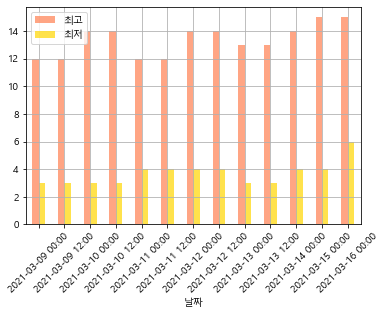

In [16]:
kdf.loc['서울'][['최고','최저']].plot(kind='bar', grid=True, color=['coral', 'gold'], alpha=0.7, rot=45)
plt.show()

#### 7. 연천 지역 최저기온이 -1 도 이하인데이터를 구하시오.

In [17]:
# query문 사용.
kdf.loc['연천'].query('최저<=-1')

,날씨,최저,최고,느낌
날짜,,,,
2021-03-09 00:00,구름많음,-4,11,추움
2021-03-09 12:00,맑음,-4,11,추움
2021-03-10 00:00,맑음,-3,14,추움
2021-03-10 12:00,맑음,-3,14,추움
2021-03-13 00:00,맑음,-1,14,추움
2021-03-13 12:00,맑음,-1,14,추움


##### 8. 백령도 지역 전체 최고기온 중 최고기온이 10도 이상이 차지하는비율을 구하시오. (예를 들어  출력결과 : 10 이상  40% )

In [18]:
round( (len(kdf.loc['백령도'].query('최고 >= 10')) / len(kdf.loc['서울'])) * 100, 2)

38.46

#### 9. 일교차 컬럼을 추가하고, 최고기온과 최저기온의 차이가 가장 높은 도시, 날짜, 최저, 최고, 일교차를 구하시오.

In [19]:
kdf['일교차'] = kdf['최고']- kdf['최저']
kdf.nlargest(1, columns='일교차', keep='all')

날씨  최저  최고  느낌  일교차
도시 날짜                                   
양주 2021-03-10 00:00  맑음  -3  16  추움   19
   2021-03-10 12:00  맑음  -3  16  추움   19
가평 2021-03-10 00:00  맑음  -3  16  추움   19
   2021-03-10 12:00  맑음  -3  16  추움   19